In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score # Import precision_score, recall_score, and f1_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier


In [3]:
# Loading the uploaded Excel file
file_path = '/content/glass.xlsx'
glassData = pd.ExcelFile(file_path)


In [4]:
# Displaying sheet names to understand the structure of the file
glassData.sheet_names


['Description', 'glass']

In [5]:
# Load the required sheet containing the data
glass_df = glassData.parse('glass')


In [6]:
# Display the first few rows to understand the structure of the dataset
glass_df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


################# Exploratory data analysis (EDA) ####################

In [7]:
#Check dataset information and summary statistics
dataInfo = glass_df.info()
data_description = glass_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
#Checking for the missing values
missing_values = glass_df.isnull().sum()


In [10]:
#Identifying potential outliers and inconsistencies in numerical columns
outliersSummary = glass_df.describe()


In [11]:
#Display results
dataInfo, data_description, missing_values, outliersSummary


(None,
                RI          Na          Mg          Al          Si           K  \
 count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
 mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
 std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
 min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
 25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
 50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
 75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
 max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   
 
                Ca          Ba          Fe        Type  
 count  214.000000  214.000000  214.000000  214.000000  
 mean     8.956963    0.175047    0.057009    2.780374  
 std      1.423153    0.497219    0.097439    2.103739  
 min      5.430000    0.0

############# Visualize the distribution of numerical features ###########

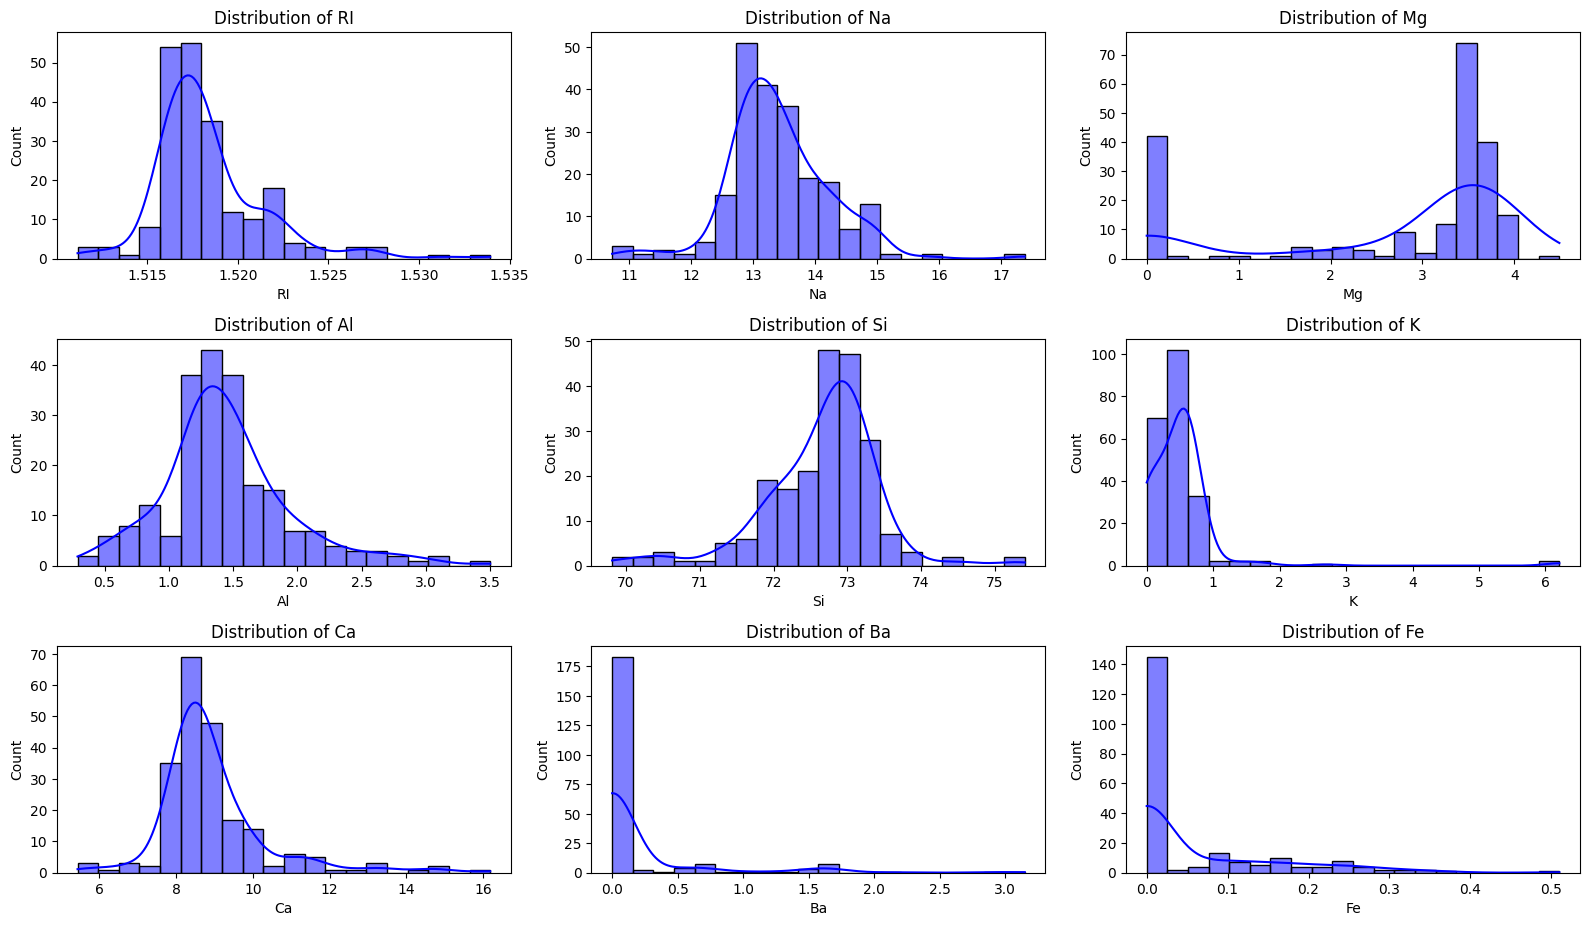

In [12]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(glass_df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(glass_df[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


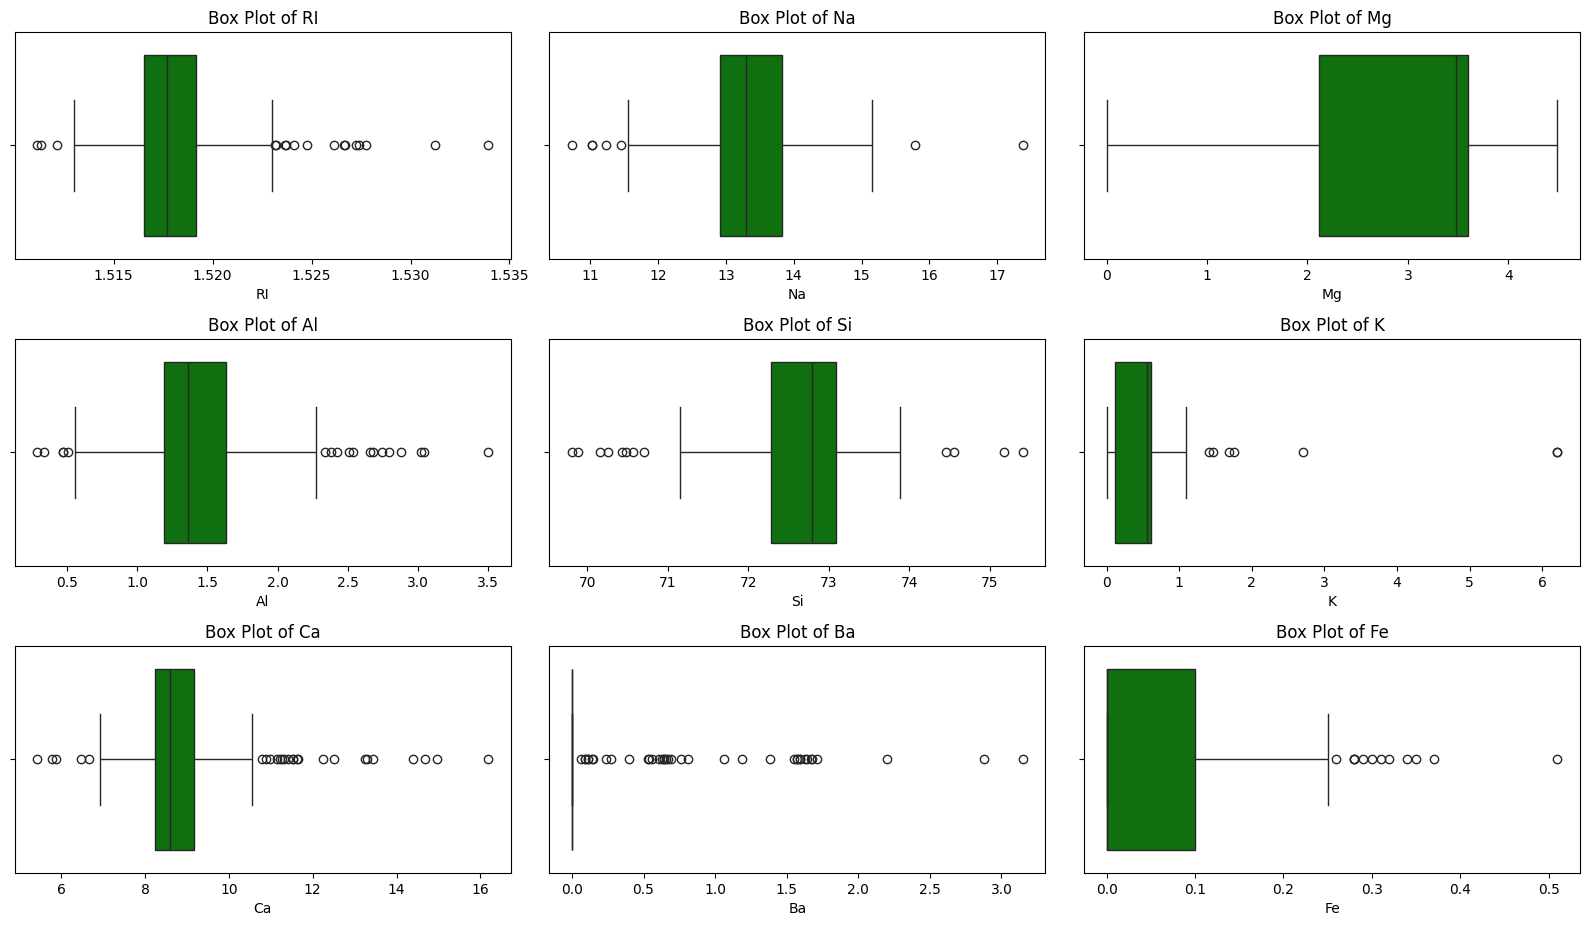

In [13]:
# Visualize box plots to identify outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(glass_df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=glass_df[column], color='green')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


<ipython-input-14-4299f350227a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=glass_df, palette='viridis')


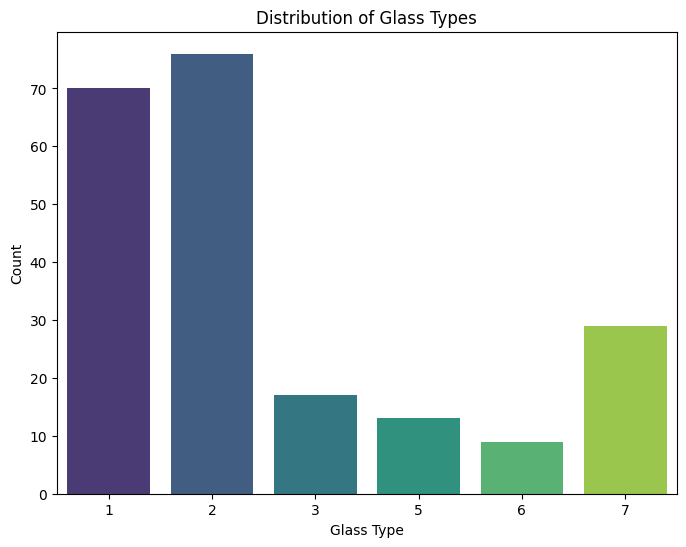

In [14]:
# Check the class distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=glass_df, palette='viridis')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()


In [15]:
# Calculate the correlation matrix for numerical features
correlation_matrix = glass_df.corr()


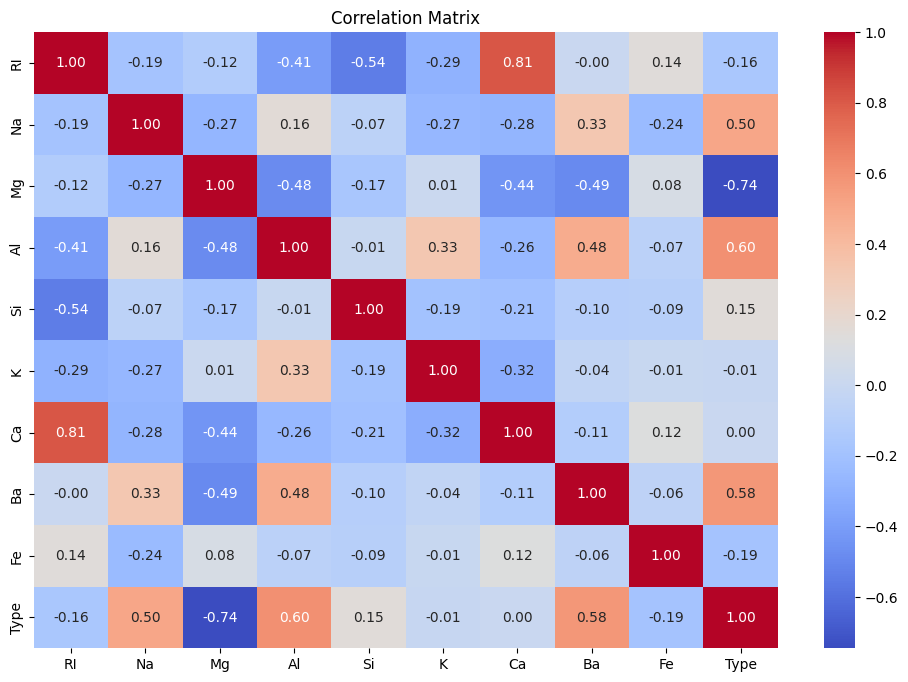

In [16]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Highlight positive or negative correlations (threshold > 0.5 or < -0.5)
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
strong_correlations.dropna(how='all', inplace=True)
strong_correlations.dropna(how='all', axis=1, inplace=True)
strong_correlations


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,NaN,NaN,NaN,-0.542052,NaN,0.810403,NaN,NaN,NaN
Na,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502898
Mg,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.744993
Al,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.598829
Si,-0.542052,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Ca,0.810403,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.575161
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Type,NaN,0.502898,-0.744993,0.598829,NaN,NaN,NaN,0.575161,NaN,1.000000


################# Data Preprocessing #####################

In [18]:
# Reload the relevant sheet containing the data
glass_df = glassData.parse('glass')


In [19]:
# Checking for missing values and handle them
missing_values = glass_df.isnull().sum()
strategy = "No missing values detected. No imputation or removal required."


In [20]:
# Checking for categorical variables and apply encoding techniques
categorical_columns = glass_df.select_dtypes(include=['object']).columns


In [21]:
# If there are any categorical variables, apply one-hot encoding
if not categorical_columns.empty:
    glass_df = pd.get_dummies(glass_df, columns=categorical_columns, drop_first=True)
    encoding_strategy = "One-hot encoding applied."
else:
    encoding_strategy = "No categorical variables found. Encoding not required."


########### Apply feature scaling techniques ############

In [22]:
# Identify numerical columns
numerical_columns = glass_df.select_dtypes(include=['float64', 'int64']).columns


In [23]:
# Apply StandardScaler for standardization
scaler = StandardScaler()
glass_df[numerical_columns] = scaler.fit_transform(glass_df[numerical_columns])


In [24]:
# Separate features and target variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']


In [25]:
# Simulating a balanced distribution for visualization purposes
class_distribution_before = y.value_counts()


In [26]:
# Scaled dataset ready for further use
scaled_data = glass_df.copy()


In [27]:
# Visualize scaled features and class distribution
scaled_data.head(), class_distribution_before


(         RI        Na        Mg        Al        Si         K        Ca  \
 0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
 1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
 2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
 3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
 4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
 
          Ba        Fe      Type  
 0 -0.352877 -0.586451 -0.848275  
 1 -0.352877 -0.586451 -0.848275  
 2 -0.352877 -0.586451 -0.848275  
 3 -0.352877 -0.586451 -0.848275  
 4 -0.352877 -0.586451 -0.848275  ,
 Type
 -0.371816    76
 -0.848275    70
  2.010478    29
  0.104643    17
  1.057560    13
  1.534019     9
 Name: count, dtype: int64)

########## Random Forest Model Implementation ###########

In [30]:
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

glassData = pd.ExcelFile(file_path)


In [31]:
# Load the glass sheet containing the data
glass_df = glassData.parse('glass')


In [34]:
# 1: Data Preprocessing
# Separate features and target variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']


In [35]:
# 2: Split the data into train and test sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# 3: Implement Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report_result = classification_report(y_test, y_pred)


In [39]:
# Print the output of random forest
accuracy, precision, recall, f1, classification_report_result


(0.8372093023255814,
 0.866828165374677,
 0.8372093023255814,
 0.8330452594474481,
 '              precision    recall  f1-score   support\n\n           1       0.69      1.00      0.81        11\n           2       0.90      0.64      0.75        14\n           3       1.00      0.67      0.80         3\n           5       1.00      0.75      0.86         4\n           6       1.00      1.00      1.00         3\n           7       0.89      1.00      0.94         8\n\n    accuracy                           0.84        43\n   macro avg       0.91      0.84      0.86        43\nweighted avg       0.87      0.84      0.83        43\n')

############## Bagging and Boosting Methods ###########################

In [40]:
# Bagging: Random Forest as a base estimator
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)


In [41]:
# Boosting: AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)


In [42]:
# Boosting: Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)


In [43]:
# Evaluate all models using accuracy, precision, recall, and F1-score
results = {
    "Bagging": {
        "Accuracy": accuracy_score(y_test, bagging_pred),
        "Precision": precision_score(y_test, bagging_pred, average='weighted'),
        "Recall": recall_score(y_test, bagging_pred, average='weighted'),
        "F1-Score": f1_score(y_test, bagging_pred, average='weighted')
    },
    "AdaBoost": {
        "Accuracy": accuracy_score(y_test, adaboost_pred),
        "Precision": precision_score(y_test, adaboost_pred, average='weighted'),
        "Recall": recall_score(y_test, adaboost_pred, average='weighted'),
        "F1-Score": f1_score(y_test, adaboost_pred, average='weighted')
    },
    "Gradient Boosting": {
        "Accuracy": accuracy_score(y_test, gradient_boosting_pred),
        "Precision": precision_score(y_test, gradient_boosting_pred, average='weighted'),
        "Recall": recall_score(y_test, gradient_boosting_pred, average='weighted'),
        "F1-Score": f1_score(y_test, gradient_boosting_pred, average='weighted')
    }
}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
# Display the results
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1-Score
Bagging,0.860465,0.881694,0.860465,0.855390
AdaBoost,0.534884,0.450280,0.534884,0.472396
Gradient Boosting,0.860465,0.879937,0.860465,0.850129
